***Participantes (RM - NOME):***<br>
Vitor Luiz Carvalhal - 337129<br>
Ricardo Fabbro Antonelli - 339505<br>
Bartira Lira Lafiandre - 340177<br>
Tiago Batista Pessoa - 339575<br>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

In [16]:
#recupera os dados da planilha origem
filename= "./data/solicitacoescredito.csv"
file= pd.read_csv(filename,sep=",",decimal='.', engine='python')
file = file.reindex(sorted(file.columns), axis=1)
#file.drop(file.columns[0],inplace=True,axis=1)
#file.drop(["cluster"],inplace=True,axis=1)
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   anoFundacao                  8228 non-null   float64
 1   ativoCirculante              4733 non-null   float64
 2   capitalSocial                8228 non-null   float64
 3   cnpjSemTraco                 8973 non-null   object 
 4   custos                       8223 non-null   float64
 5   dashboardCorrelacao          8973 non-null   float64
 6   dataAprovadoEmComite         558 non-null    object 
 7   dataAprovadoNivelAnalista    7011 non-null   object 
 8   definicaoRisco               8973 non-null   object 
 9   diferencaPercentualRisco     8973 non-null   float64
 10  duplicatasAReceber           4733 non-null   float64
 11  empresa_MeEppMei             8228 non-null   object 
 12  endividamento                4733 non-null   float64
 13  estoque           

In [17]:
file["data_aprovacao"] = np.where(file["dataAprovadoNivelAnalista"].isnull() == True,file["dataAprovadoEmComite"],file["dataAprovadoNivelAnalista"])

In [18]:
file.data_aprovacao.isnull().sum()

1404

In [19]:
file2=file[["data_aprovacao","valorAprovado"]].copy()

In [21]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data_aprovacao  7569 non-null   object 
 1   valorAprovado   7569 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.3+ KB


In [22]:
#Separa apenas os registros que possuam valor para a coluna da nossa variavel target e depois dropa as linhas com na
file2=file2[file2["data_aprovacao"].notna()]
file2=file2.drop_duplicates()
file2=file2.dropna()

In [23]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7568 entries, 0 to 8961
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data_aprovacao  7568 non-null   object 
 1   valorAprovado   7568 non-null   float64
dtypes: float64(1), object(1)
memory usage: 177.4+ KB


In [32]:
#df=file2.groupby(['data_aprovacao','valorAprovado']).sum()
df=file2.groupby('data_aprovacao', as_index=False).agg({"valorAprovado": "sum"})

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7568 entries, 0 to 7567
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data_aprovacao  7568 non-null   object 
 1   valorAprovado   7568 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.4+ KB


TypeError: unhashable type: 'numpy.ndarray'

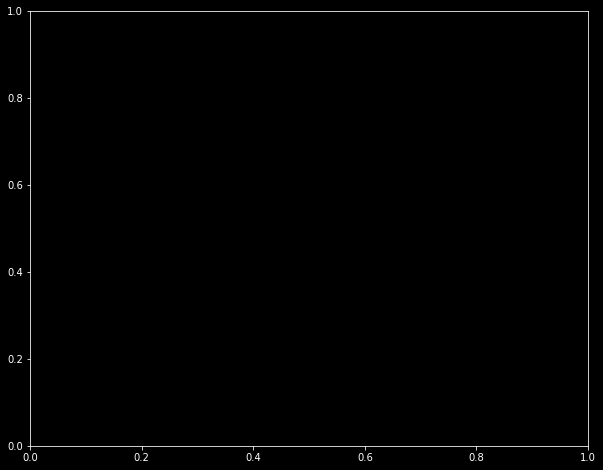

In [34]:
plt.figure(figsize=(10,8))
plt.plot(df)